In [40]:
# Fonte: http://dados.gov.br/dataset/gastos-com-publicidade

import pandas as pd

df = pd.read_csv(r'./distrito-federal/pagamento-publicidade-2018-dados-abertos-anual.csv',
                 encoding='ISO-8859-1',
                 sep=';')

df.columns = df.columns = df.columns.str.lstrip().str.rstrip()
df['Bruto PI'] = df['Bruto PI'].str.replace('.', '').str.replace(',', '.')
df['Bruto PI'] = df['Bruto PI'].astype(float)

print('Gastos com Publicidade do DF em 2018:')
print('\tTotal de campanhas realizadas: ', df['NF'].count())
print('\tValor da campanha mais cara: R$ ', "{:.2f}".format(df['Bruto PI'].max()))
print('\tValor da campanha mais barata: R$ ', "{:.2f}".format(df['Bruto PI'].min()))
print('\tValor médio por campanha: R$ ', "{:.2f}".format(df['Bruto PI'].mean()))
print('\tTotal gasto: R$ ', "{:.2f}".format(df['Bruto PI'].sum()))

print('\nMídia x Custo:\n', df.groupby('Mídia').sum()['Bruto PI'].sort_values(ascending=False).head())

Gastos com Publicidade do DF em 2018:
	Total de campanhas realizadas:  2690
	Valor da campanha mais cara: R$  754500.00
	Valor da campanha mais barata: R$  230.00
	Valor médio por campanha: R$  13777.43
	Total gasto: R$  30613450.91

Mídia x Custo:
 Mídia
TV          9690036.60
Jornal      6566005.22
Rádio       4038494.85
Filme       3050940.14
Internet    2047816.38
Name: Bruto PI, dtype: float64


In [41]:
# Fonte: http://dados.gov.br/dataset/mec-prouni

import pandas as pd

df = pd.read_csv('./prouni/pda-bolsistas-prouni-2018.csv',
                 encoding='ISO-8859-1',
                 sep=';')

print('> Tipos de curso PROUNI 2018:\n',
      df['NOME_TURNO_CURSO_BOLSA'].unique())

print('\n> Distribuição dos tipos de curso PROUNI 2018:\n',
      df['NOME_TURNO_CURSO_BOLSA'].value_counts())

print('\n> Top 5 Cursos PROUNI 2018 FSA:\n',
      df.loc[df['MUNICIPIO_BENEFICIARIO_BOLSA'] == 'FEIRA DE SANTANA']\
            .groupby('NOME_CURSO_BOLSA').size()\
            .sort_values(ascending=False)\
            .head(5))

pd.pivot_table(df.loc[df['MUNICIPIO_BENEFICIARIO_BOLSA'] == 'FEIRA DE SANTANA'],
               index='NOME_IES_BOLSA',
               columns='TIPO_BOLSA',
               values='CODIGO_EMEC_IES_BOLSA', 
               aggfunc='count', 
               margins=True, 
               margins_name='TOTAL',
               fill_value=0).sort_values('TOTAL', ascending=False).head(10)

> Tipos de curso PROUNI 2018:
 ['Noturno' 'Matutino' 'Integral' 'Curso a distância' 'Vespertino']

> Distribuição dos tipos de curso PROUNI 2018:
 Noturno              117941
Curso a distância     68278
Matutino              44751
Integral               6898
Vespertino             6249
Name: NOME_TURNO_CURSO_BOLSA, dtype: int64

> Top 5 Cursos PROUNI 2018 FSA:
 NOME_CURSO_BOLSA
PEDAGOGIA          114
ADMINISTRAÇÃO       92
ENFERMAGEM          48
EDUCAÇÃO FÍSICA     42
PSICOLOGIA          39
dtype: int64


TIPO_BOLSA,BOLSA INTEGRAL,BOLSA PARCIAL 50%,TOTAL
NOME_IES_BOLSA,,,
TOTAL,739,226,965
CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,203,0,203
FACULDADE DE TECNOLOGIA E CIÊNCIAS DE FEIRA DE SANTANA,122,0,122
Faculdade Unirb - Feira de Santana,52,60,112
FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIRA DE SANTANA,24,84,108
UNIVERSIDADE SALVADOR,92,0,92
FACULDADE ANÍSIO TEIXEIRA DE FEIRA DE SANTANA,91,0,91
CENTRO UNIVERSITÁRIO INTERNACIONAL,9,25,34
FACULDADE EDUCACIONAL DA LAPA,14,16,30


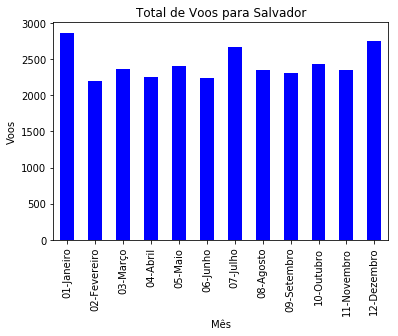

In [42]:
# Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import glob

%matplotlib inline


all_csv = glob.glob(r'./anac/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)
    
df = pd.concat(li, sort=False)


df = df[(df['Situação Voo'] == 'REALIZADO') & (df['ICAO Aeródromo Destino'] == 'SBSV')]

df['Partida Prevista'] = pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M')
df['Mês'] = df['Partida Prevista'].apply(lambda x: x.month)

df['Mês'] = df['Mês'].map({1:'01-Janeiro',
                           2:'02-Fevereiro',
                           3:'03-Março',
                           4:'04-Abril',
                           5:'05-Maio',
                           6:'06-Junho',
                           7:'07-Julho',
                           8:'08-Agosto',
                           9:'09-Setembro',
                           10:'10-Outubro',
                           11:'11-Novembro',
                           12:'12-Dezembro'})

voos = df.groupby('Mês')['Número Voo'].count()

grafico = voos.plot(kind='bar', color='blue', title='Total de Voos para Salvador')
grafico.set_xlabel('Mês')
grafico.set_ylabel('Voos')

df.to_csv('anac_voos_salvador.csv')